<h2 style='color:blue'>Enabling GPU Available</h2>

<p>
    How to install gpu on mac <br>
    https://medium.com/mlearning-ai/install-tensorflow-on-mac-m1-m2-with-gpu-support-c404c6cfb580<br>
    You need to use pip3 instead of pip if you are using python3
</p>

In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-13.4-arm64-arm-64bit
Tensor Flow Version: 2.12.0
Keras Version: 2.12.0

Python 3.9.13 (main, Aug 25 2022, 18:24:45) 
[Clang 12.0.0 ]
Pandas 2.0.2
Scikit-Learn 1.2.2
SciPy 1.10.1
GPU is available


In [4]:
tf.test.is_built_with_cuda()

False

In [6]:
import tensorflow as tf
print(tf.__version__)
physical_devices = tf.config.list_physical_devices('GPU')
tf.print(physical_devices)

2.12.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


<h2 style='color:blue'> Loading Data </h2>

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 48s 0us/step


In [8]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
y_train[1][0]

9

In [14]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

deer


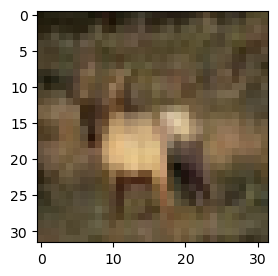

In [23]:
def plot_sample(index):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(30,3))
    plt.imshow(x_train[index])
    print(classes[y_train[index][0]])
    
plot_sample(3)

In [28]:
x_train_scaled = x_train/255
x_test_scales = x_test/255

<h2 style='color:blue'> One hot encoding y_train categorical data </h2>

In [32]:
y_train_categorical = tf.keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = tf.keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [33]:
y_train_categorical.shape

(50000, 10)

In [34]:
y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

<h2 style='color:blue'> Model Creation </h2>

In [35]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [44]:
from tensorflow import keras
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.9649 - accuracy: 0.3016
Epoch 2/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.9755 - accuracy: 0.3162
Epoch 3/50
1563/1563 [==============================] - 23s 15ms/step - loss: 2.5785 - accuracy: 0.2718
Epoch 4/50
1563/1563 [==============================] - 23s 15ms/step - loss: 3.5415 - accuracy: 0.2453
Epoch 5/50
1563/1563 [==============================] - 23s 15ms/step - loss: 4.6070 - accuracy: 0.2367
Epoch 6/50
1563/1563 [==============================] - 23s 15ms/step - loss: 6.3532 - accuracy: 0.2258
Epoch 7/50
1563/1563 [==============================] - 23s 15ms/step - loss: 8.6661 - accuracy: 0.2219
Epoch 8/50
1563/1563 [==============================] - 23s 15ms/step - loss: 12.0359 - accuracy: 0.2185
Epoch 9/50
1563/1563 [==============================] - 23s 15ms/step - loss: 16.8741 - accuracy: 0.2192
Epoch 10/50
1563/1563 [==============================] - 23s 1

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(x_test_scaled)

In [ ]:
print('Predicted : ',classes[np.argmax(y_pred[0])])
print('Actual : ', classes[y_test[0][0]])

In [ ]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model